# Reto 2: Gráficas de barras

## 1. Objetivos:
- Aprender a hacer gráficas de barras de distintos tipos
 
---
    
## 2. Desarrollo:

Para este ejercicio vamos a utilizar el dataset 'melbourne_housing-clean.csv'. La fuente original [está aquí](https://www.kaggle.com/anthonypino/melbourne-housing-market), en caso de que quieras recordar de qué trata.

Vamos a realizar 3 gráficas de barras utilizando este dataset. Las instrucciones para cada una son las siguientes:

1. Gráfica de barras *verticales* usando la columna `rooms`. El eje y será el *conteo de frecuencia* de cada categoría. Las barras tienen que quedar *ordenadas en orden descendente* (es decir, de la más larga a la màs corta). Para lograr ordenarlas, tendrás que revisar [la documentación](https://seaborn.pydata.org/generated/seaborn.barplot.html) de la gráfica de barras de Seaborn.

2. Gráfica de barras *verticales* de la columna `types`. El eje y será el *porcentaje de frecuencia* de cada categoría.

3. Gráfica de barras *h*orizontales* de la columna `council_area`. El eje x será el *conteo de frecuencia* de cada categoría.

**Todas** las gráficas deberán de tener títulos y nombres adecuados para los ejes. También deberán de tener el tamaño correcto para que la visualización sea comprensible.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/jaeem006/beduadp/master/Datasets/melbourne_housing-clean.csv", index_col=0)
df.sample(3)

,suburb,address,rooms,type,price,method,seller_g,date,distance,postcode,bedroom_2,bathroom,car,land_size,council_area,latitude,longitude,region_name,property_count
114,Albert Park,44 Greig St,2,h,1750000.0,S,Marshall,27/11/2016,3.3,3206.0,2.0,1.0,1.0,162.0,Port Phillip,-37.84160,144.94880,Southern Metropolitan,3280.0
5732,Southbank,909/118 Kavanagh St,2,u,430000.0,PI,Dingle,12/11/2016,1.2,3006.0,2.0,2.0,0.0,2295.0,Melbourne,-37.82560,144.96220,Southern Metropolitan,8400.0
9229,Mentone,2/68 Naples Rd,2,t,800000.0,SP,Hodges,3/06/2017,20.0,3194.0,2.0,1.0,1.0,0.0,Kingston,-37.98937,145.06723,South-Eastern Metropolitan,6162.0


In [25]:
df['rooms'].value_counts(ascending=False).index

Int64Index([3, 2, 4, 1, 5, 6, 7, 8], dtype='int64')

Text(0.5, 0, 'Número de habitaciones')

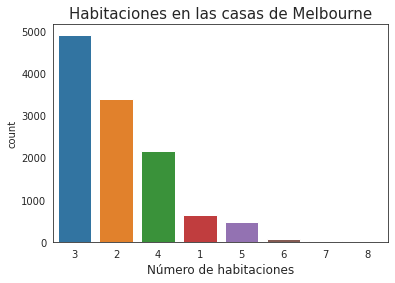

In [6]:
# Grafica de barras verticales usando `rooms`
ax = sns.countplot(data=df,
              x='rooms',
              order = df['rooms'].value_counts().index.to_list())
ax.set_title("Habitaciones en las casas de Melbourne", fontsize = 15)
ax.set_xlabel("Número de habitaciones", size = 12)
#sns.despine()
#
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)

In [19]:
df['type']\
.apply(lambda x: dict(h='house', u='unit-duplex',t='townhouse')[x])\
.value_counts(normalize = True) * 100

house          66.649493
unit-duplex    24.549201
townhouse       8.801305
Name: type, dtype: float64

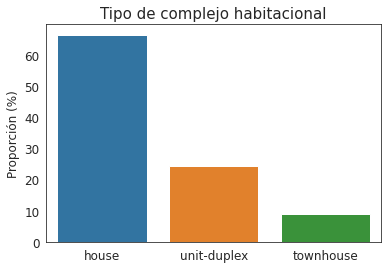

In [16]:
# Grafica de barras verticales
perc_type = df['type']\
            .apply(lambda x: dict(h='house', u='unit-duplex',t='townhouse')[x])\
            .value_counts(normalize=True) * 100
ax = sns.barplot(x = perc_type.index, y = perc_type)
ax.set_title("Tipo de complejo habitacional", fontsize = 15)
ax.set_ylabel("Proporción (%)", size = 12)
ax.tick_params(axis = 'both', labelsize = 12)

In [27]:
df['council_area'].value_counts()

Moreland             1129
Boroondara           1128
Moonee Valley         961
Darebin               895
Glen Eira             831
Stonnington           710
Maribyrnong           675
Yarra                 644
Port Phillip          622
Banyule               557
Bayside               473
Melbourne             463
Hobsons Bay           418
Brimbank              392
Monash                313
Manningham            300
Whitehorse            290
Kingston              177
Hume                  128
Whittlesea            122
Wyndham                68
Knox                   65
Maroondah              62
Melton                 49
Greater Dandenong      47
Frankston              39
Casey                  31
Nillumbik              26
Yarra Ranges           16
Macedon Ranges          6
Cardinia                6
Moorabool               2
Mitchell                1
Name: council_area, dtype: int64

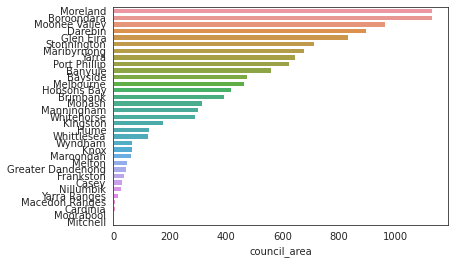

In [28]:
# Grafica de barras horizontales de `council_area`
ax = sns.barplot(y = df['council_area'].value_counts().index,
                 x = df['council_area'].value_counts())
ax